In [51]:
import pandas as pd
import numpy as np
import sklearn as ak
import matplotlib.pyplot as plt
import prince
import seaborn as sns
import utils
from dython.nominal import associations
import visuals
import random

In [52]:
df= pd.read_csv('DatosDemograficos.csv')

In [53]:
#sustituyo los valores nulos por No
df['NumeroPersonas'].fillna('No',inplace=True)
#borro la col de marca teporal
df.drop(['Marcatemporal'], axis=1,inplace=True)
df.head()

,EDAD,SEXO,estudios,TIPOTRABAJO,FUNCIONDESARROLLADA,GestionaEquipos,NumeroPersonas
0,42,Mujer,Postgrado / Máster / Doctorado,Cuenta ajena,Puesto intermedio,Sí,1-5 personas
1,29,Mujer,Postgrado / Máster / Doctorado,Cuenta ajena,Empleado,No,No
2,33,Hombre,Postgrado / Máster / Doctorado,Cuenta ajena,Puesto intermedio,Sí,1-5 personas
3,41,Hombre,Estudios universitarios,Cuenta ajena,Puesto directivo,Sí,+ de 20 personas
4,27,Hombre,Postgrado / Máster / Doctorado,Cuenta ajena,Empleado,No,No


In [54]:
df['NumeroPersonas'].fillna('No',inplace=True)


# Exploración y Análisis Análisis de los datos.

## Divido los datos en categoricos y numericos

In [55]:
cols_cat=['SEXO', 'estudios', 'TIPOTRABAJO','FUNCIONDESARROLLADA', 'GestionaEquipos', 'NumeroPersonas']
cols_num=['EDAD']
df_cat = df[cols_cat]
df_num = df[cols_num]
display(df_cat.head())
display(df_num.head())

,SEXO,estudios,TIPOTRABAJO,FUNCIONDESARROLLADA,GestionaEquipos,NumeroPersonas
0,Mujer,Postgrado / Máster / Doctorado,Cuenta ajena,Puesto intermedio,Sí,1-5 personas
1,Mujer,Postgrado / Máster / Doctorado,Cuenta ajena,Empleado,No,No
2,Hombre,Postgrado / Máster / Doctorado,Cuenta ajena,Puesto intermedio,Sí,1-5 personas
3,Hombre,Estudios universitarios,Cuenta ajena,Puesto directivo,Sí,+ de 20 personas
4,Hombre,Postgrado / Máster / Doctorado,Cuenta ajena,Empleado,No,No


,EDAD
0,42
1,29
2,33
3,41
4,27


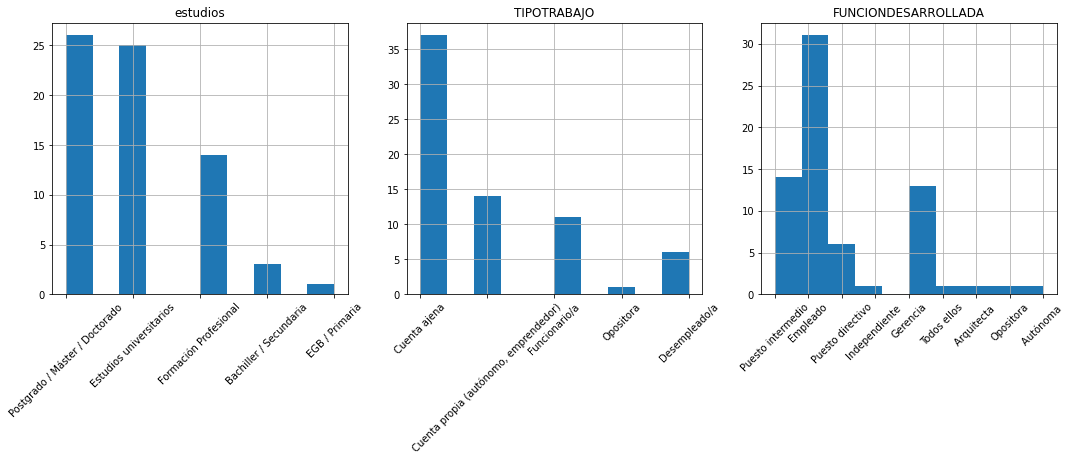

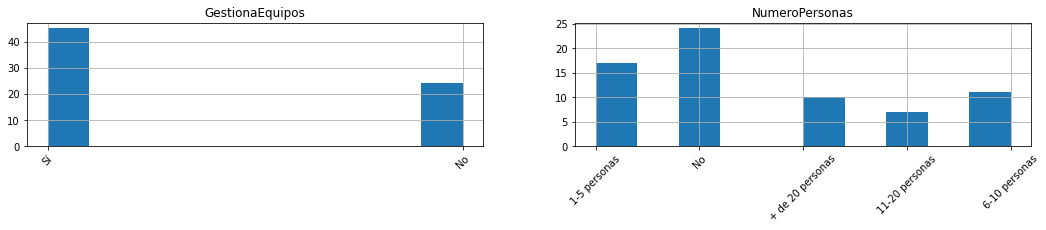

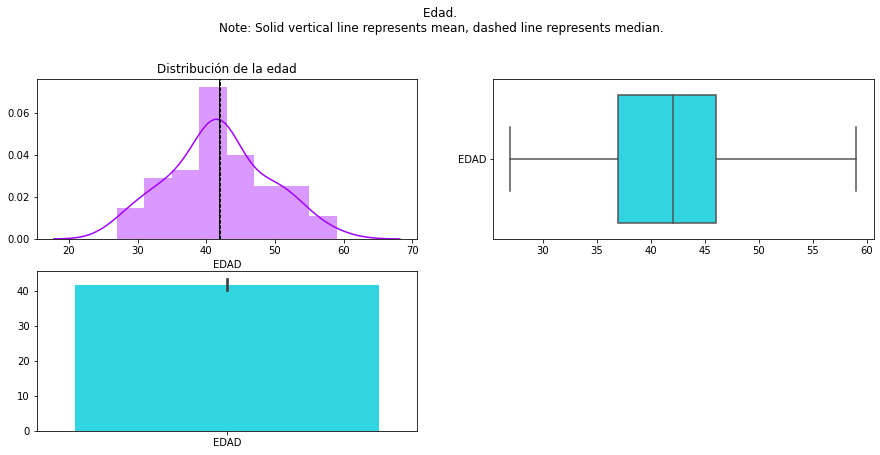

In [56]:
clr  =  [ '#12efff' ,  '#abc222' ,  '#00ef00',  '#ffa700' ,  '#d62d20' ,  '#a200ff']
plt.subplots(figsize=(15,10))

plt.figure(1)

ax1=plt.subplot(1,3,1)
plt.xticks(rotation=45)
ax1.set_title('estudios')
df['estudios'].hist (figsize=(18,5))

ax1=plt.subplot(1,3,2)
plt.xticks(rotation=45)
ax1.set_title('TIPOTRABAJO')
df['TIPOTRABAJO'].hist(figsize=(18,5))

ax1=plt.subplot(1,3,3)
plt.xticks(rotation=45)
ax1.set_title('FUNCIONDESARROLLADA')
df['FUNCIONDESARROLLADA'].hist(figsize=(18,5))

plt.figure(2)

ax1=plt.subplot(2,2,1)
plt.xticks(rotation=45)
ax1.set_title('GestionaEquipos')
df['GestionaEquipos'].hist(figsize=(18,5))

ax1=plt.subplot(2,2,2)
plt.xticks(rotation=45)
ax1.set_title('NumeroPersonas')
df['NumeroPersonas'].hist(figsize=(18,5))

plt.subplots(figsize=(15,10))
plt.figure(3)
plt.suptitle(u'Edad. \n' 'Note: Solid vertical line represents mean, dashed line represents median.')

ax1=plt.subplot(3,2,1)
sns.distplot(df_num['EDAD'], color =clr[5])
plt.axvline(df_num['EDAD'].mean(), color='#000000', linestyle='solid', linewidth=1)
plt.axvline(df_num['EDAD'].median(), color='#000000', linestyle='dashed', linewidth=1)
ax1.set_title('Distribución de la edad')

ax1=plt.subplot(3,2,2)
_= sns.boxplot(data=df_num, orient='h', palette=clr,ax=ax1)

#Values range
ax2=plt.subplot(3,2,3)
_ = sns.barplot(data=df_num, palette=clr,ax=ax2)





# Verifico en que grado los datos se asocian.

Start |End | Classification
--- | --- | --- | --- | ---
(+-) 0.00|(+-) 0.09|Zero correlation.
(+-) 0.10|(+-) 0.19|Very weak correlation.
(+-) 0.20|(+-) 0.49|Weak correlation.
(+-) 0.50|(+-) 0.69|Moderate correlation.
(+-) 0.70|(+-) 0.84|Significant correlation.
(+-) 0.85|(+-) 0.95|Strong correlation.
(+-) 0.96|(+-) 1.0 |Perfect correlation.

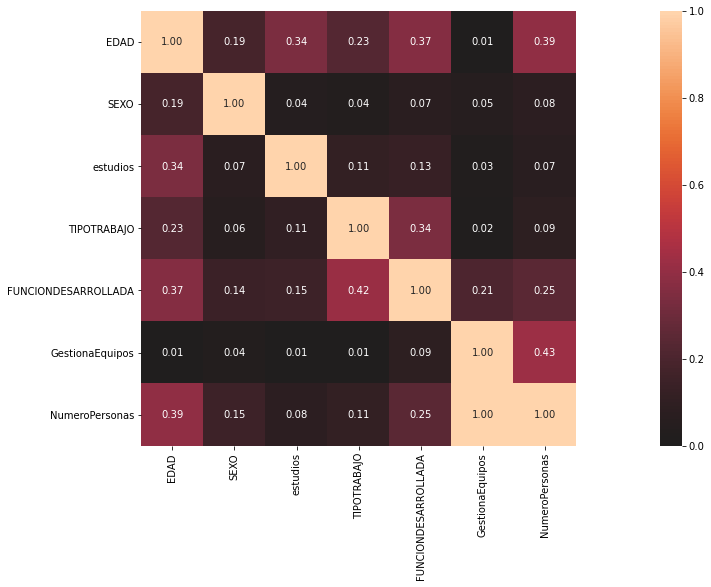

{'corr':                          EDAD      SEXO  estudios  TIPOTRABAJO  \
 EDAD                 1.000000  0.187252  0.343052     0.228495   
 SEXO                 0.187252  1.000000  0.044284     0.036235   
 estudios             0.343052  0.070360  1.000000     0.112072   
 TIPOTRABAJO          0.228495  0.056076  0.109161     1.000000   
 FUNCIONDESARROLLADA  0.366606  0.142686  0.151474     0.417792   
 GestionaEquipos      0.009083  0.038902  0.014374     0.011852   
 NumeroPersonas       0.391148  0.150916  0.079309     0.111684   
 
                      FUNCIONDESARROLLADA  GestionaEquipos  NumeroPersonas  
 EDAD                            0.366606         0.009083        0.391148  
 SEXO                            0.074421         0.047634        0.078688  
 estudios                        0.125524         0.027963        0.065701  
 TIPOTRABAJO                     0.337222         0.022458        0.090118  
 FUNCIONDESARROLLADA             1.000000         0.206636        0.2

In [8]:
associations(df, theil_u=True, figsize=(30, 8))

## Seleciono 5 personas al azar

In [9]:
indices = [5,23,65]
print("Indices: {}".format(indices))
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(df.loc[indices], columns = df.keys()).reset_index(drop = True)
print("Ejemplos escogidos:")
display(samples)

Indices: [5, 23, 65]
Ejemplos escogidos:


,EDAD,SEXO,estudios,TIPOTRABAJO,FUNCIONDESARROLLADA,GestionaEquipos,NumeroPersonas
0,52,Hombre,Postgrado / Máster / Doctorado,Cuenta ajena,Puesto intermedio,Sí,11-20 personas
1,40,Hombre,EGB / Primaria,"Cuenta propia (autónomo, emprendedor)",Gerencia,Sí,1-5 personas
2,48,Mujer,Postgrado / Máster / Doctorado,Cuenta ajena,Empleado,No,No


Text(0.5, 1.0, 'Comparación de los percentiles de la muestra.')

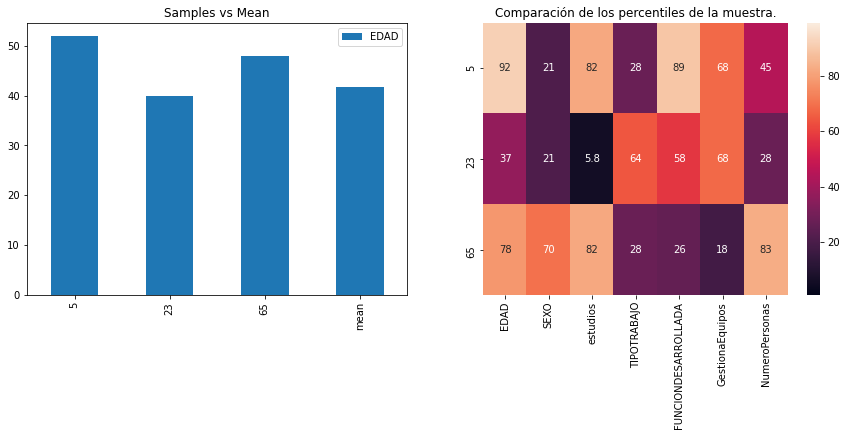

In [10]:
ax1 = plt.subplot(1, 2, 1)

#The means 
mean_data = df.describe().loc['mean', :]

#Append means to the samples' data
samples_bar = samples.append(mean_data)

#Construct indices
samples_bar.index = indices + ['mean']

#Plot bar plot
samples_bar.plot(kind='bar', figsize=(15,5), ax=ax1)
ax1.set_title("Samples vs Mean")

ax2 = plt.subplot(1, 2, 2)

# percentile ranks of the whole dataset.
percentiles = df.rank(pct=True)

# Round it up, and multiply by 100
percentiles = 100*percentiles.round(decimals=3)

# Select the indices from the percentiles dataframe
percentiles = percentiles.iloc[indices]

# Now, create the heat map
sns.heatmap(percentiles, vmin=1, vmax=99, ax=ax2, annot=True)
ax2.set_title("Comparación de los percentiles de la muestra.")



# Descubrir los patrones en los datos

In [11]:
#Realizo una busqueda de 8 patrones
famd = prince.FAMD(n_components=8, n_iter=100, copy=True, check_input=True, engine='auto', random_state=1976)
famd = famd.fit(df)


Text(0.5, 0, 'Principal Component')

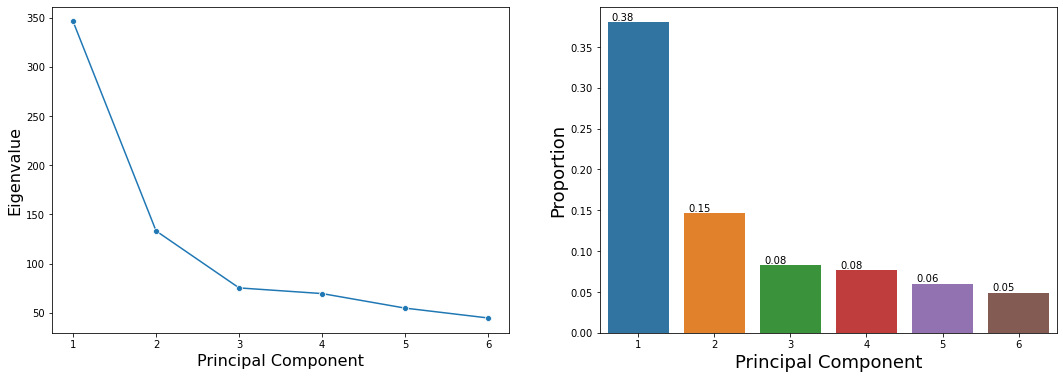

In [12]:
dset = pd.DataFrame()
dset['famd'] = range(1,7)
dset['eigenvalue'] = pd.DataFrame(famd.eigenvalues_)
plt.figure(figsize=(18,6))
ax1 = plt.subplot(1, 2, 1)
sns.lineplot(x='famd', y='eigenvalue', marker="o", data=dset)
plt.ylabel('Eigenvalue', fontsize=16)
plt.xlabel('Principal Component', fontsize=16)

ax1 = plt.subplot(1, 2, 2)
dset['vari'] = pd.DataFrame(famd.explained_inertia_)

graph = sns.barplot(x='famd', y='vari', data=dset)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                   ha='center', va='bottom',
                   color= 'black')
plt.ylabel('Proportion', fontsize=18)
plt.xlabel('Principal Component', fontsize=18)

De la gráfica de arriba podemos ver que escogiendo los componentes 1 y 2 obtenemos que explican la mayor varianza del conjunto de datos.
Es decir, los dos patrones.

In [13]:
famd.column_correlations(df).head(10)

,0,1,2,3,4,5,6,7
EDAD,-0.150243,-0.008891,-0.017437,0.124813,-0.134855,0.014847,-0.261348,0.805549
FUNCIONDESARROLLADA_Arquitecta,-0.121663,-0.062816,0.019078,-0.169613,-0.159897,-0.115257,0.081260,-0.168878
FUNCIONDESARROLLADA_Autónoma,-0.143149,0.136566,0.198911,-0.051083,-0.150453,0.109131,0.011646,-0.002299
FUNCIONDESARROLLADA_Empleado,0.581429,0.583369,-0.104328,0.038089,0.638844,-0.236237,-0.158583,-0.043828
FUNCIONDESARROLLADA_Gerencia,-0.425372,-0.346137,0.484538,0.152877,-0.487738,-0.274315,-0.034428,0.245198
FUNCIONDESARROLLADA_Independiente,-0.141652,0.136753,0.199437,-0.055017,-0.145646,0.108550,0.022892,-0.038243
FUNCIONDESARROLLADA_Opositora,-0.288645,-0.053682,0.010730,-0.113136,-0.018202,-0.099760,-0.108285,0.190874
FUNCIONDESARROLLADA_Puesto directivo,-0.162338,-0.129920,-0.091400,-0.119696,-0.169147,0.160373,-0.336071,0.110285
FUNCIONDESARROLLADA_Puesto intermedio,0.055858,-0.300129,-0.414202,-0.019751,-0.034704,0.488566,0.422311,-0.192299
FUNCIONDESARROLLADA_Todos ellos,-0.138300,-0.136075,0.029976,0.078780,-0.073318,-0.144012,0.136447,-0.214241


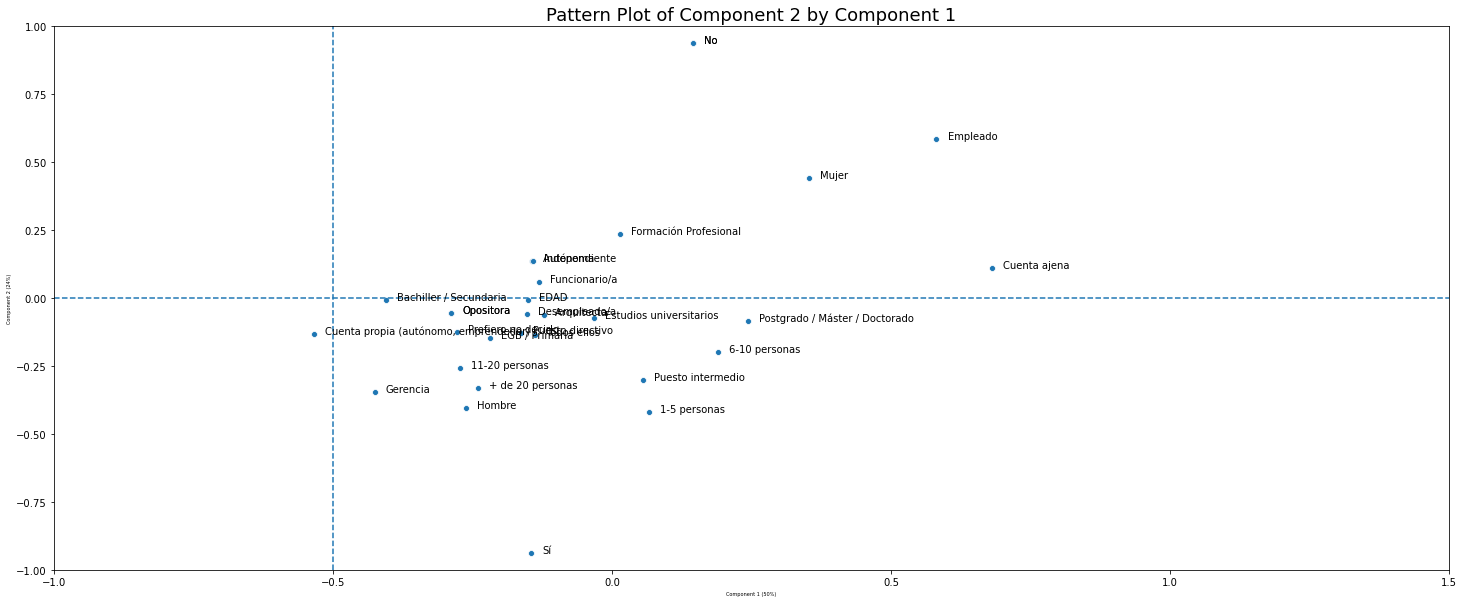

In [14]:
scatter = pd.DataFrame(famd.column_correlations(df)).reset_index()
plt.figure(figsize=(25,10))
ax = sns.scatterplot(x=0, y=1, data=scatter)
ax.set(ylim=(-1, 1), xlim=(-1,1.5))
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        texto= str(point['val']).split("_")
        valor = texto[-1]        
        ax.text(point['x']+.02, point['y'],valor )
label_point(scatter[0], scatter[1], scatter['index'], plt.gca())  
plt.axvline(-0.5, ls='--')
plt.axhline(0, ls='--')
plt.title('Pattern Plot of Component 2 by Component 1', fontsize=18)
plt.xlabel('Component 1 (50%)', fontsize=5)
plt.ylabel('Component 2 (24%)', fontsize=5)
plt.show()

## Evaluo la muestra tomada de 3 personas

In [15]:

famd_muestra = famd.fit(samples)
display(famd_muestra.column_correlations(samples))

,0,1,2
EDAD,0.942058,-0.915149,0.922551
FUNCIONDESARROLLADA_Empleado,-0.151375,-0.568799,-0.204577
FUNCIONDESARROLLADA_Gerencia,-0.780358,0.996685,-0.745421
FUNCIONDESARROLLADA_Puesto intermedio,0.931733,-0.427886,0.949998
GestionaEquipos_No,-0.151375,-0.568799,-0.204577
GestionaEquipos_Sí,0.151375,0.568799,0.204577
NumeroPersonas_1-5 personas,-0.780358,0.996685,-0.745421
NumeroPersonas_11-20 personas,0.931733,-0.427886,0.949998
NumeroPersonas_No,-0.151375,-0.568799,-0.204577
SEXO_Hombre,0.151375,0.568799,0.204577


### Implementation: Dimensionality Reduction
Me quedo con los componentes 1 y 2

In [16]:
df.head()

,EDAD,SEXO,estudios,TIPOTRABAJO,FUNCIONDESARROLLADA,GestionaEquipos,NumeroPersonas
0,42,Mujer,Postgrado / Máster / Doctorado,Cuenta ajena,Puesto intermedio,Sí,1-5 personas
1,29,Mujer,Postgrado / Máster / Doctorado,Cuenta ajena,Empleado,No,No
2,33,Hombre,Postgrado / Máster / Doctorado,Cuenta ajena,Puesto intermedio,Sí,1-5 personas
3,41,Hombre,Estudios universitarios,Cuenta ajena,Puesto directivo,Sí,+ de 20 personas
4,27,Hombre,Postgrado / Máster / Doctorado,Cuenta ajena,Empleado,No,No


In [17]:
samples.head()

,EDAD,SEXO,estudios,TIPOTRABAJO,FUNCIONDESARROLLADA,GestionaEquipos,NumeroPersonas
0,52,Hombre,Postgrado / Máster / Doctorado,Cuenta ajena,Puesto intermedio,Sí,11-20 personas
1,40,Hombre,EGB / Primaria,"Cuenta propia (autónomo, emprendedor)",Gerencia,Sí,1-5 personas
2,48,Mujer,Postgrado / Máster / Doctorado,Cuenta ajena,Empleado,No,No


In [18]:
#Realizo una busqueda de 8 patrones
famd = prince.FAMD(n_components=2, n_iter=100, copy=True, check_input=True, engine='auto', random_state=1976)
famd = famd.fit(df)
reduced_data = famd.transform(df)
reduced_data.columns= ['Dimension 1', 'Dimension 2']
display(reduced_data.head())

,Dimension 1,Dimension 2
0,21.535437,-8.498663
1,22.469757,16.806703
2,19.860403,-13.875130
3,17.593194,-11.688511
4,20.793638,11.429710


In [19]:
df

,EDAD,SEXO,estudios,TIPOTRABAJO,FUNCIONDESARROLLADA,GestionaEquipos,NumeroPersonas
0,42,Mujer,Postgrado / Máster / Doctorado,Cuenta ajena,Puesto intermedio,Sí,1-5 personas
1,29,Mujer,Postgrado / Máster / Doctorado,Cuenta ajena,Empleado,No,No
2,33,Hombre,Postgrado / Máster / Doctorado,Cuenta ajena,Puesto intermedio,Sí,1-5 personas
3,41,Hombre,Estudios universitarios,Cuenta ajena,Puesto directivo,Sí,+ de 20 personas
4,27,Hombre,Postgrado / Máster / Doctorado,Cuenta ajena,Empleado,No,No
...,...,...,...,...,...,...,...
64,34,Mujer,Estudios universitarios,Funcionario/a,Empleado,Sí,1-5 personas
65,48,Mujer,Postgrado / Máster / Doctorado,Cuenta ajena,Empleado,No,No
66,32,Hombre,Estudios universitarios,Funcionario/a,Puesto intermedio,Sí,1-5 personas
67,35,Mujer,Postgrado / Máster / Doctorado,Desempleado/a,Puesto directivo,Sí,6-10 personas


No handles with labels found to put in legend.


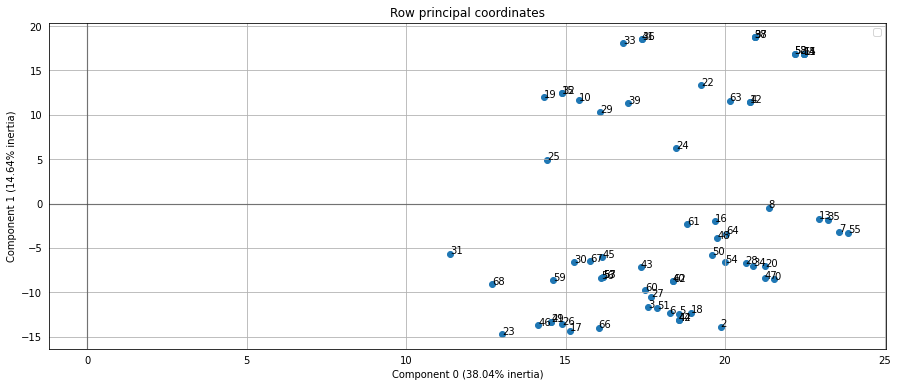

In [20]:
ax = famd.plot_row_coordinates(df, ax=None,figsize=(15, 6), x_component=0,
     y_component=1,
     labels=df.index,
     #color_labels=['Component {}'.format(t) for t in df.index[5,23,65]],
     ellipse_outline=False,
     ellipse_fill=True,
     show_points=True
 )
ax.get_figure().savefig('famd_row_coordinates.svg')

In [21]:
from sklearn.cluster import KMeans

In [22]:
# Create range of clusters 
list_n_clusters = list(range(2,7))
print("The two implementations will be testing with a list tha include 5 diferentes clusters sizes:")
print (list_n_clusters)

The two implementations will be testing with a list tha include 5 diferentes clusters sizes:
[2, 3, 4, 5, 6]


In [23]:
import visuals

In [24]:
clusterer = KMeans(n_clusters=2, random_state=1976).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
#sample_preds = clusterer.predict(pca_samples)

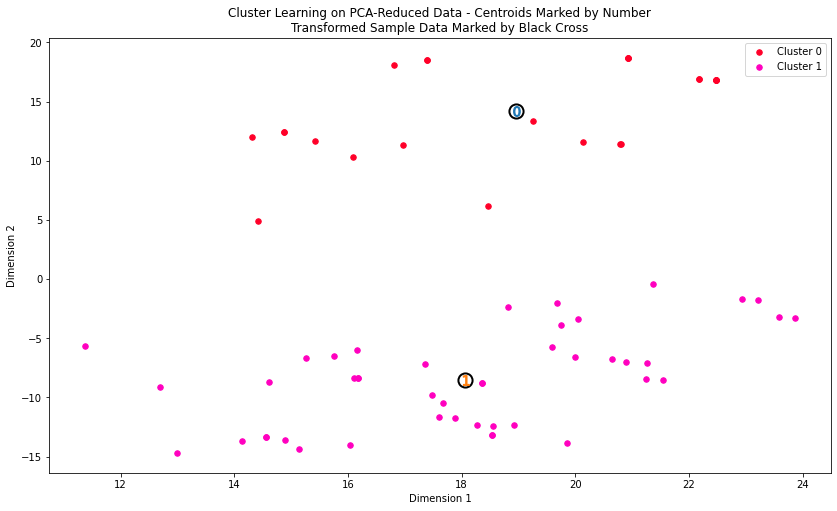

In [25]:
visuals.cluster_results(reduced_data, preds, centers, None)

# Asigno a cada encuestado el segmento  al que pertenece.
nota: ver la última columna.

In [26]:

market = famd.inverse_transform (reduced_data)
df_market=  np.exp(pd.DataFrame(market,columns = list(market.keys())))

df_preds=pd.DataFrame({'Segment':preds }) 
df_segment_data = pd.concat([df_market, df_preds], axis = 1)

df_segment_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Segment
0,3.211987,6.368145e+05,1.277260,1.024315,95.724698,36.049953,1.024319,1.209823,4.440572,59.805519,...,3204.618790,18.892242,3.725901,7.495038,1.209823,1640.869735,752.524379,1.656503,0.980900,1
1,419068.183484,2.238361e+00,1.028124,1.570385,172335.871093,0.802015,1.570407,1.004447,1.541562,1.974299,...,9590.226323,3.765289,2.220876,11.644916,1.004447,5.563909,183153.026669,0.920493,0.966706,0
2,0.186023,4.947293e+06,1.322078,0.924889,12.067701,69.238111,0.924889,1.247761,5.149165,101.162785,...,1435.208958,22.633955,3.850088,5.897361,1.247761,3789.460492,132.121152,1.838169,0.985551,1
3,0.296836,6.254851e+05,1.273780,0.942554,10.778238,38.893308,0.942554,1.211090,4.159506,54.897295,...,636.993216,15.218145,3.256705,4.856045,1.211090,1284.721300,85.493721,1.690405,0.986872,1
4,24258.492111,1.738618e+01,1.064196,1.417930,21714.944852,1.540310,1.417946,1.035942,1.787493,3.339341,...,4293.178112,4.510649,2.294796,9.161583,1.035942,12.847485,32139.339777,1.021440,0.971292,0
5,0.265902,1.358458e+06,1.291767,0.938024,11.936164,48.177805,0.938025,1.224671,4.513972,69.193026,...,902.671637,17.764040,3.480328,5.285149,1.224671,1939.889173,106.807250,1.743374,0.986213,1
6,0.258488,1.153177e+06,1.287880,0.937290,11.143597,46.128263,0.937291,1.221824,4.430578,65.777474,...,809.953959,17.114118,3.421991,5.143202,1.221824,1769.152299,97.232964,1.732834,0.986481,1
7,58.454775,9.911372e+04,1.238304,1.136246,837.307011,19.726836,1.136253,1.176195,3.915234,37.517682,...,8222.426495,16.494448,3.681138,9.866309,1.176195,792.136114,4866.067098,1.503059,0.975914,1
8,121.947307,9.648064e+03,1.187717,1.169226,892.574922,10.229270,1.169234,1.137200,3.095716,18.978485,...,3791.500837,10.745839,3.084359,8.233019,1.137200,239.108285,3604.423791,1.365155,0.976868,1
9,697581.097406,4.420672e-01,0.998691,1.601849,179779.311773,0.507720,1.601872,0.981142,1.308919,1.228261,...,5585.081463,2.793345,1.963259,10.261696,0.981142,2.415780,148284.872126,0.860853,0.967371,0


In [27]:
# Total number of records
n_records = df_segment_data.Segment.count()

# Number of records where individual's segment is 0
n_segment0 = df_segment_data[df_segment_data.Segment == 0].Segment.count()

# Number of records where individual's segment is 1
n_segment1 = df_segment_data[df_segment_data.Segment == 1].Segment.count()

# Percentage of customer whose segment is 0
percent_segment0 = float(n_segment0)*100/n_records 

# Percentage of customer whose segment is 1
percent_segment1 = float(n_segment1)*100/n_records 
# Print the results
print("Total number of records: {}".format(n_records))
print("Customer in Segment 0: {}".format(n_segment0 ))
print("Customer in Segment 1: {}".format(n_segment1))
print("Percentage of customer in the segment 0: {:.2f}%".format(percent_segment0))
print("Percentage of customer in the segment 1: {:.2f}%".format(percent_segment1))

Total number of records: 69
Customer in Segment 0: 24
Customer in Segment 1: 45
Percentage of customer in the segment 0: 34.78%
Percentage of customer in the segment 1: 65.22%


In [31]:
df_segment_data.reset_index()
df_segment_data.to_csv('segmentos.csv')